# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Linear Regression

$$ f(x) = a_1 x + a_0 $$

In [2]:
data = np.load('../data/linear.npy')

In [3]:
x = data[:, 0, np.newaxis]
y = data[:, 1]

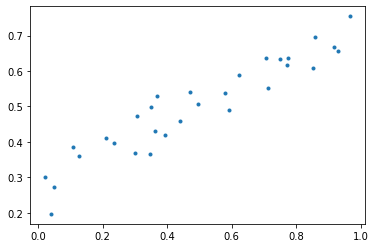

In [4]:
plt.plot(x, y, '.')

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linear = LinearRegression()

In [13]:
linear.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred = linear.predict(x)

Text(0, 0.5, 'y')

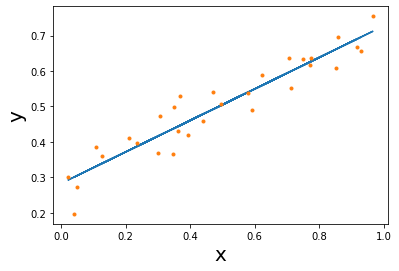

In [15]:
plt.plot(x, y_pred)
plt.plot(x, y, '.')

plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

In [16]:
linear.intercept_

0.28279054946376003

In [17]:
linear.coef_

array([0.44476085])

In [19]:
linear.score(x, y)

0.8925449520855074

In [13]:
help(linear.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples used in the fitting

## Quadratic Regression

In [20]:
data = np.load('../data/quadratic.npy')

In [21]:
x = data[:, 0, np.newaxis]
y = data[:, 1]

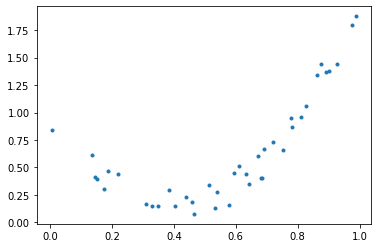

In [22]:
plt.plot(x, y, '.')

In [23]:
linear = LinearRegression()

In [24]:
linear.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
y_linear_pred = linear.predict(x)

Text(0, 0.5, 'y')

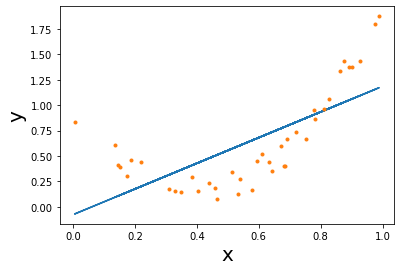

In [95]:
plt.plot(x, y_linear_pred)
plt.plot(x, y, '.')

plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

In [71]:
linear.score(x, y)

0.4779671573240187

In [72]:
linear.intercept_, linear.coef_

(-0.07854286065072003, array([1.26465202]))

$$ f(x) = a_2 x^2 + a_1 x + a_0 $$

$$ f(x_0, x_1, x_2) = a_2 x_2 + a_1 x_1 + a_0 x_0$$

$$ f(x_1, x_2) = a_2 x_2 + a_1 x_1 + a_0$$

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly = PolynomialFeatures(degree = 3, include_bias = False)

In [75]:
PolynomialFeatures?

In [76]:
poly.fit_transform(x)

array([[9.74668868e-01, 9.49979401e-01, 9.25915347e-01],
       [3.86016241e-01, 1.49008538e-01, 5.75197159e-02],
       [8.09541854e-01, 6.55358014e-01, 5.30539742e-01],
       [8.91502421e-01, 7.94776567e-01, 7.08545234e-01],
       [6.32068752e-01, 3.99510908e-01, 2.52518361e-01],
       [7.81051074e-01, 6.10040780e-01, 4.76473006e-01],
       [1.44686317e-01, 2.09341302e-02, 3.02888219e-03],
       [4.04851390e-01, 1.63904648e-01, 6.63570245e-02],
       [5.81650985e-03, 3.38317869e-05, 1.96782922e-07],
       [5.77908042e-01, 3.33977705e-01, 1.93008401e-01],
       [1.86813058e-01, 3.48991188e-02, 6.51961111e-03],
       [5.95881395e-01, 3.55074637e-01, 2.11582370e-01],
       [1.50930837e-01, 2.27801177e-02, 3.43822224e-03],
       [2.18974631e-01, 4.79498892e-02, 1.04998093e-02],
       [8.77171136e-01, 7.69429201e-01, 6.74921086e-01],
       [4.58907692e-01, 2.10596270e-01, 9.66442480e-02],
       [3.48355677e-01, 1.21351678e-01, 4.22735459e-02],
       [4.63794549e-01, 2.15105

In [77]:
from sklearn.pipeline import make_pipeline

In [78]:
"""quadratic = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression(fit_intercept=False)
)
"""
quadratic = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

In [79]:
quadratic.fit(x, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [80]:
nx = np.linspace(0, 1, 100)

In [81]:
y_quadratic_pred = quadratic.predict(nx[:, np.newaxis])

Text(0, 0.5, 'y')

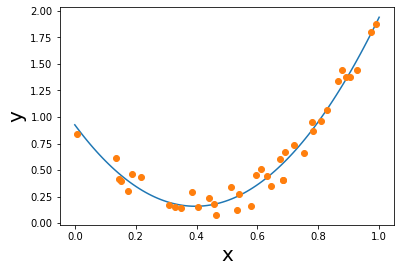

In [82]:
plt.plot(nx, y_quadratic_pred, '-')
plt.plot(x, y, 'o')

plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

In [83]:
quadratic.score(x, y)

0.9657237651995618

In [84]:
quadratic.intercept_, quadratic.coef_

AttributeError: 'Pipeline' object has no attribute 'intercept_'

In [85]:
quadratic.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                     order='C')),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))]

In [86]:
quadratic.steps[1][1].intercept_, quadratic.steps[1][1].coef_

(0.9262630985145184, array([-3.87278315,  4.88611664]))

In [68]:
#0.9262630985145184 - 3.87278315*x + 4.88611664*x**2

In [42]:
 quadratic.steps[1][1].coef_

array([ 0.9262631 , -3.87278315,  4.88611664])

In [87]:
cubic = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression()
)

In [88]:
cubic.fit(x, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [101]:
xx = np.linspace(0, 1, 100)

In [109]:
y_cubic_pred = cubic.predict(nx[:, np.newaxis])
y_quadratic_pred = quadratic.predict(nx[:, np.newaxis])

Text(0, 0.5, 'y')

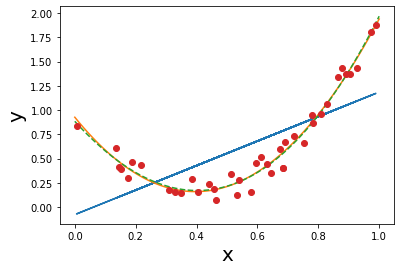

In [111]:
plt.plot(x, y_linear_pred, '-')
plt.plot(nx, y_quadratic_pred, '-')
plt.plot(nx, y_cubic_pred, '--')
plt.plot(x, y, 'o')

plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

In [113]:
quadratic.score(x, y)

0.9657237651995618

In [112]:
cubic.score(x, y)

0.9662700114958088

In [114]:
cubic.steps[1][1].coef_

array([-3.44606373,  3.90006669,  0.63006302])

### Anscomb quartet

In [115]:
import seaborn as sns

In [116]:
anscombe = sns.load_dataset('anscombe')

In [118]:
#anscombe

In [119]:
pd.concat([
    xy.reset_index(drop=True).drop(columns='dataset')
    for dataset, xy in anscombe.groupby('dataset')
], keys = anscombe.dataset.unique(), axis=1)

I           II         III           IV       
       x      y     x     y     x      y     x      y
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

In [120]:
anscombe.groupby('dataset').agg(['mean', 'std'])

x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

In [121]:
anscombe.groupby('dataset').corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

In [122]:
scores = []

for dataset, xy in anscombe.groupby('dataset'):
    
    x = xy.x[:, np.newaxis]
    y = xy.y
    
    linear.fit(x, y)
    
    scores.append({
        'Intersept': linear.intercept_,
        'Slope': linear.coef_[0],
        'R^2': linear.score(x, y)
    })

In [123]:
pd.DataFrame(scores)

,Intersept,Slope,R^2
0,3.000091,0.500091,0.666542
1,3.000909,0.500000,0.666242
2,3.002455,0.499727,0.666324
3,3.001727,0.499909,0.666707


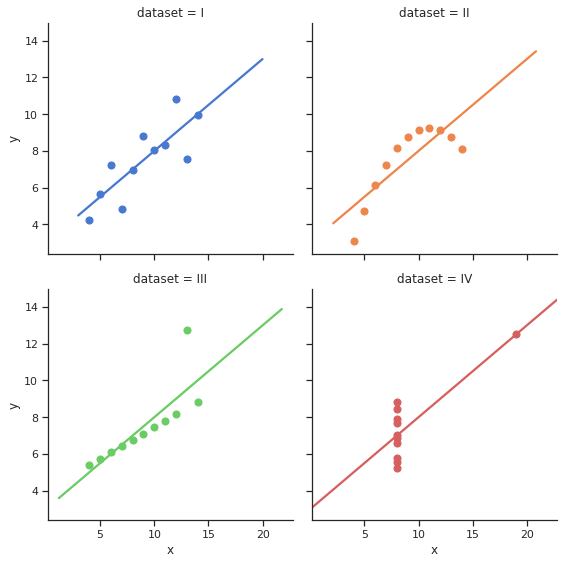

In [124]:
sns.set(style="ticks")

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

## Optimizing a Polynomial Regression

In [125]:
data = np.load('../data/poly.npy')

In [129]:
x = data[:, 0, np.newaxis]
y = data[:, 1]

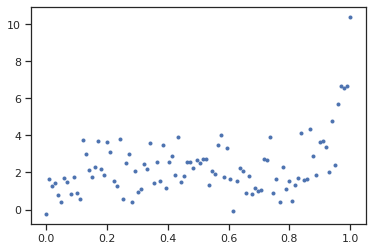

In [131]:
plt.plot(x, y, '.')

In [134]:
polynomial = make_pipeline(
    PolynomialFeatures(include_bias=False),
    LinearRegression(fit_intercept=True)
)

In [135]:
params = {
    'degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
}

In [137]:
poly

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C')

In [138]:
poly.set_params(degree = 6)

PolynomialFeatures(degree=6, include_bias=False, interaction_only=False,
                   order='C')

In [140]:
polynomial.set_params(degree = 6)

ValueError: Invalid parameter degree for estimator Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [141]:
polynomial.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'polynomialfeatures', 'linearregression', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [142]:
polynomial.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                     order='C')),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))]

In [143]:
params = {
    'polynomialfeatures__degree': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
}

In [144]:
from sklearn.model_selection import GridSearchCV

In [148]:
estimator = GridSearchCV(polynomial, params)

In [149]:
estimator.fit(x, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'polynomialfeatures__degree': [3, 4, 5, 6, 7, 8, 9, 10,
                        

In [150]:
estimator.best_params_

{'polynomialfeatures__degree': 3}

In [151]:
y_pred = estimator.predict(x)

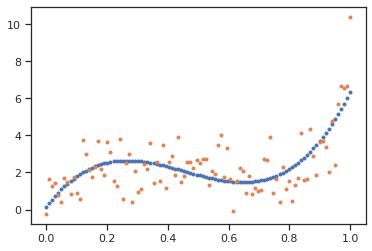

In [153]:
plt.plot(x, y_pred, '.')
plt.plot(x, y, '.')